In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [5]:
taxi=pd.read_csv("/content/TaxiFare.csv")
taxi

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [6]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
taxi.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [8]:
taxi.isnull().sum()

,0
unique_id,0
amount,0
date_time_of_pickup,0
longitude_of_pickup,0
latitude_of_pickup,0
longitude_of_dropoff,0
latitude_of_dropoff,0
no_of_passenger,0


In [9]:
taxi.drop_duplicates()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [10]:
taxi['date_time_of_pickup']=pd.to_datetime(taxi['date_time_of_pickup'])

In [11]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


Text(0, 0.5, 'no_of_passenger')

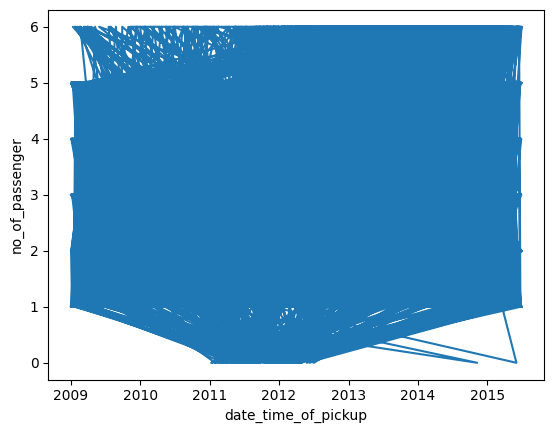

In [12]:
plt.plot(taxi["date_time_of_pickup"],taxi["no_of_passenger"])
plt.xlabel("date_time_of_pickup")
plt.ylabel("no_of_passenger")


In [13]:
taxi['hours_of_day']=taxi["date_time_of_pickup"].dt.hour
taxi['day_of_week']=taxi["date_time_of_pickup"].dt.dayofweek
taxi['month']=taxi["date_time_of_pickup"].dt.month
taxi

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hours_of_day,day_of_week,month
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,0,6
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,1,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,3,8
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1,3
...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,23,2,6
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,17,0,6
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,4,6,1
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,7,1,11


In [14]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
 8   hours_of_day          50000 non-null  int32              
 9   day_of_week           50000 non-null  int32              
 10  month                 50000 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(5), int32(3), int64(1), object(1

In [15]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
for column in taxi.select_dtypes(include='object'):
  taxi[column]=Le.fit_transform(taxi[column])
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  int64              
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
 8   hours_of_day          50000 non-null  int32              
 9   day_of_week           50000 non-null  int32              
 10  month                 50000 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(5), int32(3), int64(2)
memory us

In [16]:
taxi

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hours_of_day,day_of_week,month
0,1579,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,0,6
1,3133,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,1,1
2,2097,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,3,8
3,1839,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,5,4
4,3057,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1,3
...,...,...,...,...,...,...,...,...,...,...,...
49995,1513,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,23,2,6
49996,1157,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,17,0,6
49997,3177,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,4,6,1
49998,540,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,7,1,11


In [17]:
x=taxi.drop(["date_time_of_pickup","amount","unique_id"],axis=1)
y=taxi["amount"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8,random_state=42)
x_train,x_test,y_train,y_test

(       longitude_of_pickup  latitude_of_pickup  longitude_of_dropoff  \
 39087           -73.974332           40.791427            -73.979032   
 30893           -73.973657           40.751632            -73.969945   
 45278           -73.975263           40.752280            -73.995098   
 16398           -73.983034           40.766784            -73.971944   
 13653           -73.986717           40.771648            -73.982140   
 ...                    ...                 ...                   ...   
 11284           -73.980910           40.767860            -73.980212   
 44732           -73.960564           40.775861            -73.961830   
 38158           -73.974665           40.751742            -73.995985   
 860             -73.987243           40.722410            -73.971620   
 15795           -73.778682           40.646662            -73.993680   
 
        latitude_of_dropoff  no_of_passenger  hours_of_day  day_of_week  month  
 39087            40.766365              

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model=model.fit(x_train,y_train)
y_predict=model.predict(x_test)
y_predict

array([11.75602931, 10.86235602, 10.61728222, ..., 11.33941318,
       11.71499656, 12.07711681])

In [19]:
rf_reg=RandomForestRegressor()

In [20]:
dt_reg=DecisionTreeRegressor()

In [21]:
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
y_predrf=rf_reg.predict(x_test)
print("y predict is :",y_predrf)

y predict is : [ 8.808  24.5525  5.363  ...  9.4003 30.7724  7.321 ]


In [23]:
mse=mean_squared_error(y_test,y_predrf)
print("mse is :",mse)


mse is : 24.811981656075012


In [24]:

r2_sc=r2_score(y_test,y_predrf)
print("r2 square is :",r2_sc)


r2 square is : 0.733121033037185


In [25]:

model_score=rf_reg.score(x_test,y_test)
print("model score is:",model_score)


model score is: 0.733121033037185


In [26]:
# gridsearchcv
params={'n_estimators':[10,20,30],'max_depth':[10,20,30],'min_samples_split':[2,4,6],'min_samples_leaf':[6,7,8]}
#grid
gridsearch=GridSearchCV(estimator=rf_reg,param_grid=params,n_jobs=1,cv=10,verbose=1)
#fitting
gridsearch.fit(x_train,y_train)


Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [6, 7, 8],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 20, 30]},
             verbose=1)

In [27]:

#best params and best estimator
best_params=gridsearch.best_params_
best_rf_regressor=gridsearch.best_estimator_
# print the best parameters
print("BEST PARAMETERS:",best_params)
print("BEST  ESTIMATOR:",best_rf_regressor)


BEST PARAMETERS: {'max_depth': 30, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 20}
BEST  ESTIMATOR: RandomForestRegressor(max_depth=30, min_samples_leaf=6, n_estimators=20)


In [28]:
accu_score=best_rf_regressor.score(x_test,y_test)
print("model score is:",accu_score)



model score is: 0.7442835308333116
